<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="100%" height="100%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 미분

[안내] 미분(differentiation)과 도함수(derivative)의 차이 (영어 미적분 교과서에서 미분 챕터를 찾을 때는 derivatives를 찾으셔야 합니다.)

변화에 대해서 알고 싶을때 사용하는 수학적 도구 (예시: 연봉을 높이고 싶은데 어떻게 해야 하지?)

### 변화율(Rate of Change)

[안내] 아래 그래프에서 슬라이더를 움직였을 때 오류가 발생한다면 그래프 코드를 다시 실행시키고 해보세요.

<IPython.core.display.Javascript object>

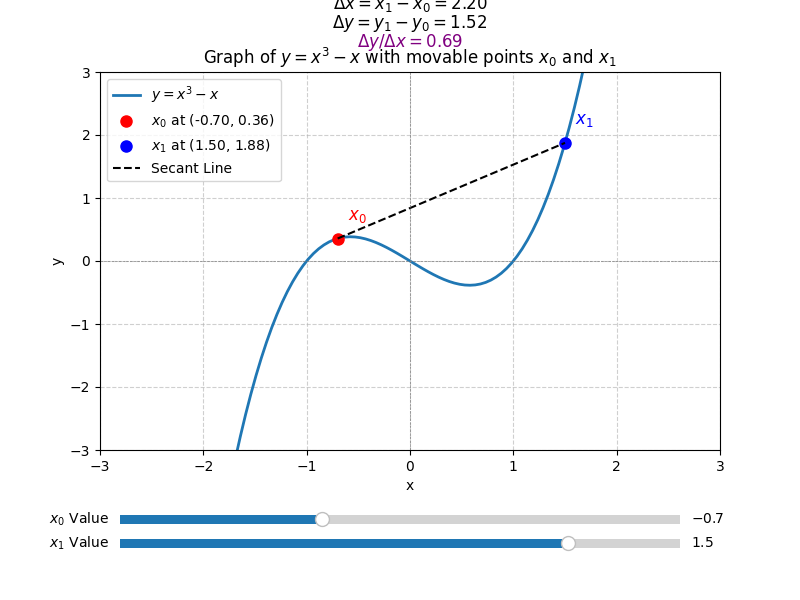

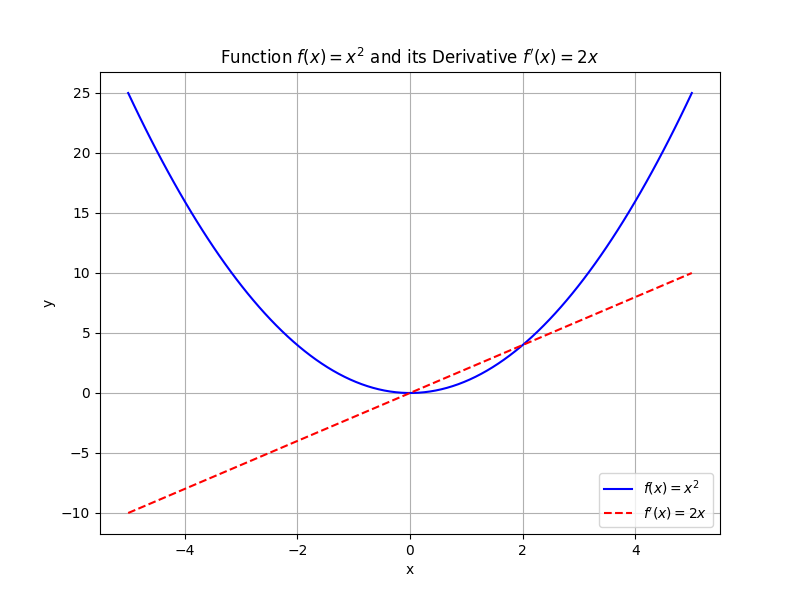

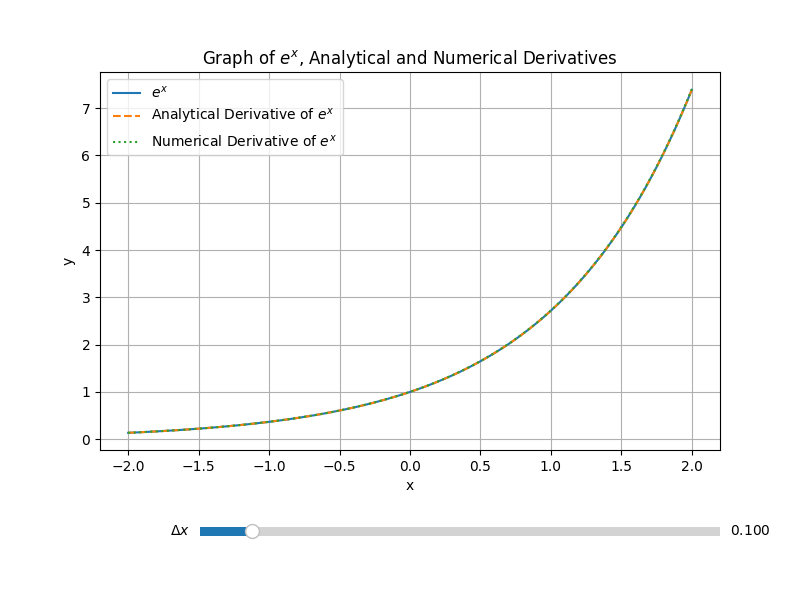

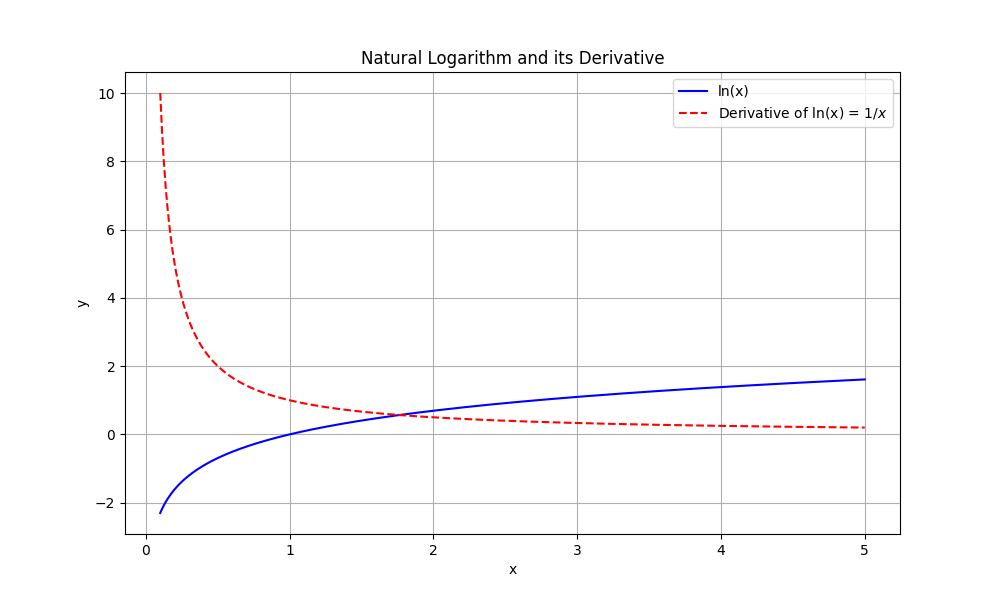

In [9]:
%matplotlib ipympl

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Define the 3rd order polynomial function
def cubic_poly(x):
    return x**3 - x # Example cubic polynomial

x_curve = np.linspace(-2.5, 2.5, 100)
y_curve = cubic_poly(x_curve) # Use the cubic function

initial_x0 = -0.7
initial_x1 = 1.5

# Calculate initial y values using the cubic function
initial_y0 = cubic_poly(initial_x0)
initial_y1 = cubic_poly(initial_x1)

fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)

# Plot the cubic curve
ax.plot(x_curve, y_curve, label='$y = x^3 - x$', lw=2)

# Plot initial points on the cubic curve
line_x0, = ax.plot(initial_x0, initial_y0, 'ro', markersize=8, label=f'$x_0$ at ({initial_x0:.2f}, {initial_y0:.2f})')
text_x0 = ax.text(initial_x0 + 0.1, initial_y0 + 0.3, '$x_0$', fontsize=12, color='red')

line_x1, = ax.plot(initial_x1, initial_y1, 'bo', markersize=8, label=f'$x_1$ at ({initial_x1:.2f}, {initial_y1:.2f})')
text_x1 = ax.text(initial_x1 + 0.1, initial_y1 + 0.3, '$x_1$', fontsize=12, color='blue')

# Plot the initial secant line
line_connecting, = ax.plot([initial_x0, initial_x1], [initial_y0, initial_y1], 'k--', lw=1.5, label='Secant Line')

initial_delta_x = initial_x1 - initial_x0
initial_delta_y = initial_y1 - initial_y0

initial_delta_y_over_delta_x = initial_delta_y / initial_delta_x if initial_delta_x != 0 else float('inf')

# Text elements for displaying values
text_delta_x = ax.text(0, 4.0, r'$\Delta x = x_1 - x_0 = ' + f'{initial_delta_x:.2f}' + r'$', fontsize=12, color='black', ha='center')
text_delta_y = ax.text(0, 3.7, r'$\Delta y = y_1 - y_0 = ' + f'{initial_delta_y:.2f}' + r'$', fontsize=12, color='black', ha='center')

ratio_display_text_initial = (f'{initial_delta_y_over_delta_x:.2f}' if np.isfinite(initial_delta_y_over_delta_x) else 'Undefined')
ratio_text_initial = r'$\Delta y / \Delta x = ' + ratio_display_text_initial + r'$'
text_delta_y_over_delta_x = ax.text(0, 3.4, ratio_text_initial, fontsize=12, color='purple', ha='center')

# Update the title and axis labels
ax.set_title("Graph of $y = x^3 - x$ with movable points $x_0$ and $x_1$")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

# Adjust axis limits for the cubic function
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3]) # Adjusted y-limits

ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax.axvline(0, color='grey', linewidth=0.5, linestyle='--')

ax_slider_x0 = plt.axes([0.15, 0.12, 0.7, 0.03])
ax_slider_x1 = plt.axes([0.15, 0.08, 0.7, 0.03])

slider_x0 = Slider(ax_slider_x0, '$x_0$ Value', -2.5, 2.5, valinit=initial_x0)
slider_x1 = Slider(ax_slider_x1, '$x_1$ Value', -2.5, 2.5, valinit=initial_x1)

# Update function to use the cubic polynomial
def update(val):
    current_x0 = slider_x0.val
    current_x1 = slider_x1.val
    # Calculate y values using the cubic function
    current_y0 = cubic_poly(current_x0)
    current_y1 = cubic_poly(current_x1)

    line_x0.set_data([current_x0], [current_y0])
    line_x1.set_data([current_x1], [current_y1])
    line_connecting.set_data([current_x0, current_x1], [current_y0, current_y1])

    current_delta_x = current_x1 - current_x0
    current_delta_y = current_y1 - current_y0

    if current_delta_x != 0:
        current_delta_y_over_delta_x = current_delta_y / current_delta_x
        ratio_display_text = f'{current_delta_y_over_delta_x:.2f}'
    else:
        ratio_display_text = 'Undefined'

    text_delta_x.set_text(r'$\Delta x = x_1 - x_0 = ' + f'{current_delta_x:.2f}' + r'$')
    text_delta_y.set_text(r'$\Delta y = y_1 - y_0 = ' + f'{current_delta_y:.2f}' + r'$')
    text_delta_y_over_delta_x.set_text(r'$\Delta y / \Delta x = ' + ratio_display_text + r'$')

    # Update text positions based on new y-values
    text_x0.set_position((current_x0 + 0.1, current_y0 + 0.3))
    text_x1.set_position((current_x1 + 0.1, current_y1 + 0.3))

    # Update labels with new coordinates
    line_x0.set_label(f'$x_0$ at ({current_x0:.2f}, {current_y0:.2f})')
    line_x1.set_label(f'$x_1$ at ({current_x1:.2f}, {current_y1:.2f})')

    ax.legend()
    fig.canvas.draw_idle()

slider_x0.on_changed(update)
slider_x1.on_changed(update)

update(None)

plt.show()

In [2]:
def func(x):
    return x**3 - x

x0 = 0.5
delta_x = 1.0
x1 = x0 + delta_x

y0 = func(x0)
y1 = func(x1)

print("x의 변화량", x1 - x0)
print("y의 변화량", y1 - y0)

print("변화량의 비율", (y1 - y0) / (x1 - x0))

x의 변화량 1.0
y의 변화량 2.25
변화량의 비율 2.25


### 도함수 구하기

어떤 함수 $y=f(x)$가 있을 때, 이를 미분하여 얻는 새로운 함수를 도함수라고 하며 $\frac{dy}{dx}$, $f'(x)$, 또는 $y'$ 등으로 표기합니다.

예를 들어, 함수 $y=x^2$의 미분 결과, 즉 도함수는 다음과 같이 정확한 함수 형태로 구해집니다:

$$
\frac{dy}{dx} = 2x 
$$

도함수를 구한 다음에는 특정 위치에서의 기울기를 쉽게 계산할 수 있습니다. 예를 들어서 $x$가 0.1일때의 미분값(기울기)는 $2 \times 0.1 = 0.2$와 같이 계산할 수 있습니다.

[프롬프트 예시] Gemini 2.0 Flash "x^2의 도함수가 2x라는 것을 증명"

해석적 미분은 미분의 정의나 미분 공식을 직접 적용하여 도함수를 계산하는 방식입니다.

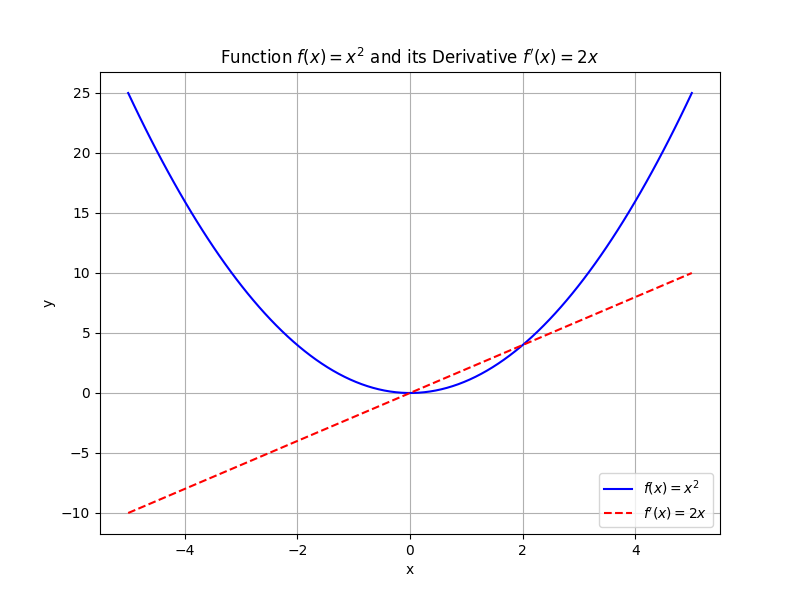

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-5, 5, 100)

y_values = x_values ** 2

f_prime_x = 2.0 * x_values

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^2$', color='blue')
plt.plot(x_values, f_prime_x, label="$f'(x) = 2x$", color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function $f(x) = x^2$ and its Derivative $f\'(x) = 2x$')
plt.legend()
plt.grid(True)

plt.show()

[지수함수(exponential function)](https://en.wikipedia.org/wiki/Exponential_function)의 도함수

$\frac{d}{dx}(e^x) = e^x$

In [4]:
import numpy as np

x_values = 3.5 

dx = 0.0001

print(np.exp(x_values))

print((np.exp(x_values + dx) - np.exp(x_values)) / dx)

33.11545195869231
33.11710778660881


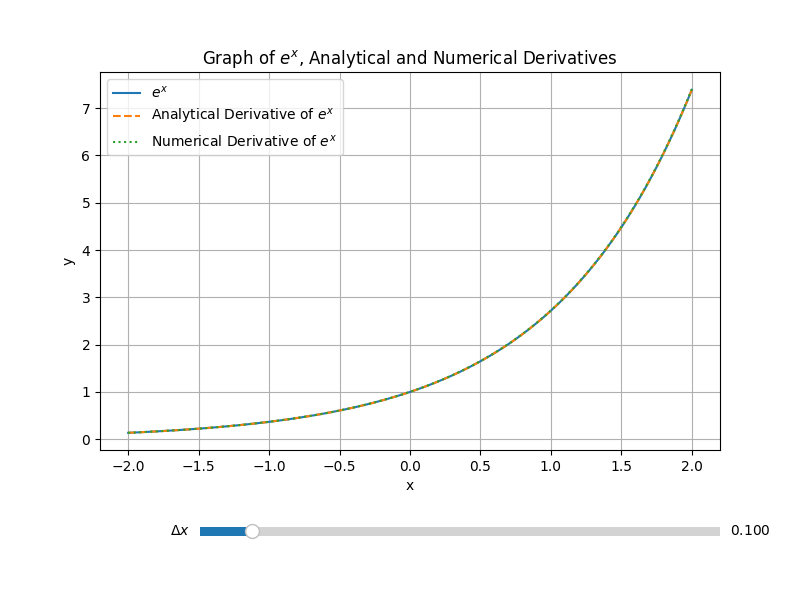

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

# Create a range of x values
x = np.linspace(-2, 2, 100)

# Calculate the corresponding y values for e^x and its analytical derivative
y = np.exp(x)
y_prime_analytical = np.exp(x)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)  # Make space for the slider

# Plot the original function and analytical derivative (these won't change)
ax.plot(x, y, label='$e^x$')
ax.plot(x, y_prime_analytical, linestyle='--', label='Analytical Derivative of $e^x$')

# Initial dx value
initial_dx = 0.1

# Calculate the initial numerical derivative
y_diff_initial = (np.exp(x + initial_dx) - np.exp(x - initial_dx)) / (2 * initial_dx)

# Plot the initial numerical derivative
# We store the line object so we can update its data later
line_y_diff, = ax.plot(x, y_diff_initial, linestyle=':', label='Numerical Derivative of $e^x$')


# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graph of $e^x$, Analytical and Numerical Derivatives')
ax.legend()
ax.grid(True)

# Define the axes for the slider
ax_dx = plt.axes([0.25, 0.1, 0.65, 0.03])  # [left, bottom, width, height]

# Create the slider
# Set a reasonable range for dx (e.g., from a very small number to something larger)
dx_slider = Slider(
    ax=ax_dx,
    label='$\\Delta x$',
    valmin=1e-3,      # Minimum value for dx
    valmax=1.0,        # Maximum value for dx
    valinit=initial_dx,  # Starting value for dx
    valstep=1e-4      # Step size for the slider
)

# Define the update function
def update(val):
    """
    This function is called when the slider value changes.
    Recalculates y_diff and updates the plot data.
    """
    current_dx = float(dx_slider.val)  # Explicitly cast to float
    print(f"Type of x: {type(x)}, Content of x[:5]: {x[:5]}")
    print(f"Type of current_dx: {type(current_dx)}, Value of current_dx: {current_dx}")
    new_y_diff = (np.exp(x + current_dx) - np.exp(x - current_dx)) / (2 * current_dx)
    line_y_diff.set_ydata(new_y_diff)  # Update the y-data of the numerical derivative line
    fig.canvas.draw_idle()  # Redraw the canvas

# Register the update function with the slider
dx_slider.on_changed(update)

# Show the plot
plt.show()

자연로그 함수 $f(x) = \ln(x)$의 도함수 

$$
f'(x) = \frac{d}{dx}(\ln(x)) = \frac{1}{x}
$$

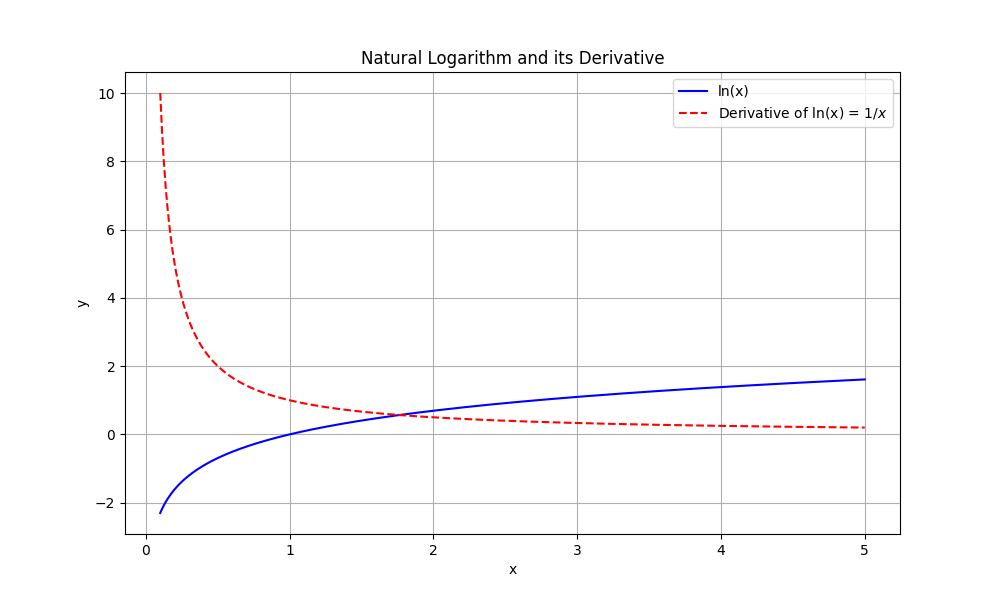

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(0.1, 5, 400)  # Avoid x=0 for ln(x)

# Calculate ln(x)
y_ln = np.log(x)

# Calculate the derivative of ln(x), which is 1/x
y_dln = 1 / x

# Create the plot
plt.figure(figsize=(10, 6))

# Plot ln(x)
plt.plot(x, y_ln, label='ln(x)', color='blue')

# Plot the derivative of ln(x)
plt.plot(x, y_dln, label='Derivative of ln(x) = $1/x$', color='red', linestyle='--')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Natural Logarithm and its Derivative')

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

### 체인룰(Chain Rule)

함수가 함수를 호출하는 복잡한 구조에서 미분을 단순화해주는 규칙입니다.

$$u = g(x)$$

$$y = f(u)$$

$$y = f(g(x))$$

> $$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

와 같이 곱하기로 계산할 수 있습니다.

[안내] 수식만으로 이해가 잘 안되시는 분들은 아래의 코드도 참고해보세요.

$$
y = (x^2 + 1)^{10}
$$

전개해보면

$$y = x^{20} + 10x^{18} + 45x^{16} + 120x^{14} + 210x^{12} + 252x^{10} + 210x^8 + 120x^6 + 45x^4 + 10x^2 + 1$$

더 복잡한 식에서는 전개하는 것만으로도 부담

구조를 단순화하기 위해서 $u = x^2 + 1$라는 매개 변수를 도입

$$u = x^2 + 1$$

$$
y = (x^2 + 1)^{10} = u^{10}
$$

체인룰을 적용하면 곱하기로 교체 

$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

$$\frac{dy}{dx} = \frac{d}{du}(u^{10}) \cdot \frac{d}{dx}(x^2 + 1) = (10 u^{9}) \cdot (2x) = 10 (x^2 + 1)^9 \cdot (2x)$$


$$ \frac{dy}{dx} = 20x(x^2 + 1)^9 $$

실제로 값을 계산할 때는 $x$로부터 전부 계산하는 방법도 있지만 $u$를 활용할 수도 있습니다. 예를 들어서 $x = 0.3$일때  

$$\frac{dy}{dx} \Big|_{x=0.3} = 20(0.3)((0.3)^2 + 1)^9 \approx 13.0313$$

또는 $u = 0.3^2 + 1 = 1.09$라는 점을 활용해서

$$
\frac{dy}{dx} \Big|_{x=0.3} =  \frac{dy}{du} \Big|_{u=1.09} \cdot \frac{du}{dx} \Big|_{x=0.3} = (10 u^{9}) \cdot (2x) = 10(1.09)^9 \cdot 0.6 \approx 13.0313
$$

와 같이 계산할 수도 있습니다. 뉴럴네트워크에서는 $u$ 값을 미리 계산했다가 미분값 계산할때 다시 사용하는 경우가 많은데 뒤에서 다시 설명드리겠습니다.


In [7]:
# 체인룰 구현 예시

def func_y(u):
    return u**10

def func_u(x):
    return x**2 + 1

def dy_du(u):
    return 10 * u**9

def du_dx(x):
    return 2 * x

x_value = 0.3 # 예시

u_value = func_u(x_value)
y_value = func_y(u_value)

dy_dx = dy_du(u_value) * du_dx(x_value)

print(y_value, dy_dx)

2.367363674592119 13.031359676653866


In [8]:
# 전개해서 미분한 것과 비교

import sympy as sp

x = sp.symbols('x')

y = x**20 + 10*x**18 + 45*x**16 + 120*x**14 + 210*x**12 + 252*x**10 + 210*x**8 + 120*x**6 + 45*x**4 + 10*x**2 + 1

dy_dx = sp.diff(y, x)

print(y.subs(x, x_value), dy_dx.subs(x, x_value))

2.36736367459212 13.0313596766539
